# LABORATORIO 1

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Carga de datos

In [2]:
data=pd.read_csv('Telefonia_movil.csv',dayfirst=True,thousands='.')
data.head(5)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,Ene-Mar 2013
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2,2013,3,10315484,7335154,17650638,Jul-Sept 2013
3,2013,4,9809515,6250549,16060064,Oct-Dic 2013
4,2014,1,10128751,5799223,15927974,Ene-Mar 2013


In [3]:
data.index = pd.PeriodIndex(data['Año'].astype(str)+'Q'+data['Trimestre'].astype(str),freq='Q')

In [4]:
data.head(5)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013


# Análisis de Datos

In [5]:
data.describe()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2015.272727,2.409091,1.209691e+07,6.604273e+06,1.870118e+07
std,1.638287,1.140555,2.077349e+06,5.251805e+05,1.990543e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.250000,1.044198e+07,6.291007e+06,1.735731e+07
50%,2015.000000,2.000000,1.164553e+07,6.580968e+06,1.883452e+07
75%,2016.750000,3.000000,1.408623e+07,7.100940e+06,1.974379e+07
max,2018.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


Se puede observar que la media, mediana, valores cuartílicos y desviación estándar de la serie de Minutos pospago son considrablemente mayores a los de la serie de Minutos prepago, significando esto que el comportamiento de la serie de Minutos totales esté dominado por la primera.

/home/vanessa/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'$Minutos$ $[Miles]$')

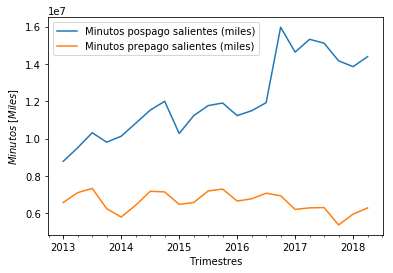

In [6]:
data.plot(y=['Minutos pospago salientes (miles)', 'Minutos prepago salientes (miles)'],
          kind='line')
plt.xlabel('Trimestres')
plt.ylabel(r'$Minutos$ $[Miles]$')

Se observa que la serie de *Minutos pospago salientes* presenta un patron de tendencia creciente. Respecto a la serie de color naranja *Minutos prepago salientes* se observa un patrón cíclico.

/home/vanessa/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'$Minutos$ $[Miles]$')

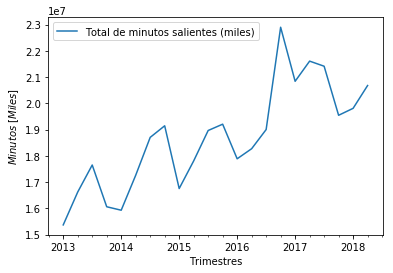

In [7]:
data.plot(y=['Total de minutos salientes (miles)'])
plt.xlabel('Trimestres')
plt.ylabel(r'$Minutos$ $[Miles]$')

La combinación de las series de minutos pospagos y prepagos resulta en una serie con un patrón tendencial más un patrón cíclico.

# **Random Walk**

In [8]:
y=data['Total de minutos salientes (miles)']

Se elige como h=4, dado que de el análisis anterior se observa un comportamiento periódico en 4 trimestres. De esta manera se puede evaluar que tan buena es la predicción cada cuatro trimestres. Sin embargo, hay que tener en cuenta que, si bien este modelo puede funcionar aceptablemente para predecir las repeticiones cíclicas del ultimo valor, no puede de ninguna manera tener en cuenta el patrón de tendencia de los datos, como es en este caso donde la serie posee un patrón de tipo tendencial creciente. También vale la pena comentar que tampoco puede predecir los valores cíclicos distintos al valor final del conjunto de datos.

In [9]:
h = 4       
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q') 
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test)
display(pred)

2018Q3    20678910
2018Q4    20678910
2019Q1    20678910
2019Q2    20678910
Freq: Q-DEC, dtype: int64

Estimación de la desviación estandar

In [10]:
resid=y-y.shift(1)
sigma = resid.std()
round(sigma,3)

1464911.401

In [11]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2018Q3,1.780774e+07,2.355008e+07
2018Q4,1.661846e+07,2.473936e+07
2019Q1,1.570589e+07,2.565193e+07
2019Q2,1.493656e+07,2.642126e+07


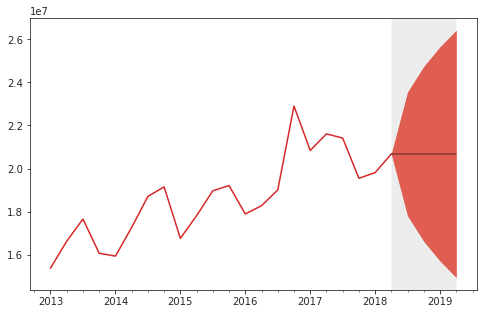

In [12]:
from forecasting.plotting import fanchart

point_pred = (intv[0]+intv[1])/2
fig, ax = fanchart(y['2010':],point_pred,intv,intv,intv)
plt.show()

Dado que el intervalo de confianza es grande, a medida que aumenta el número de periodos disminuye la presición en los puntos estimados.

# **Simple exponential smoothing**

In [13]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=0)#acá cambiamos el alpha
fitted_ses = model_ses.fittedvalues
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
aic_ses = model_ses.aic
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))


 Smoothing parameter: alpha  0.000
 In-sample fit:
 MSE               3782222216294.564
 AIC               641.149
 BIC               643.331


Si tomamos $\alpha$ igual a cero se obeserva el valor $l_{0}$ como la predición constante vista en el siguiente grafico como una linea negra.

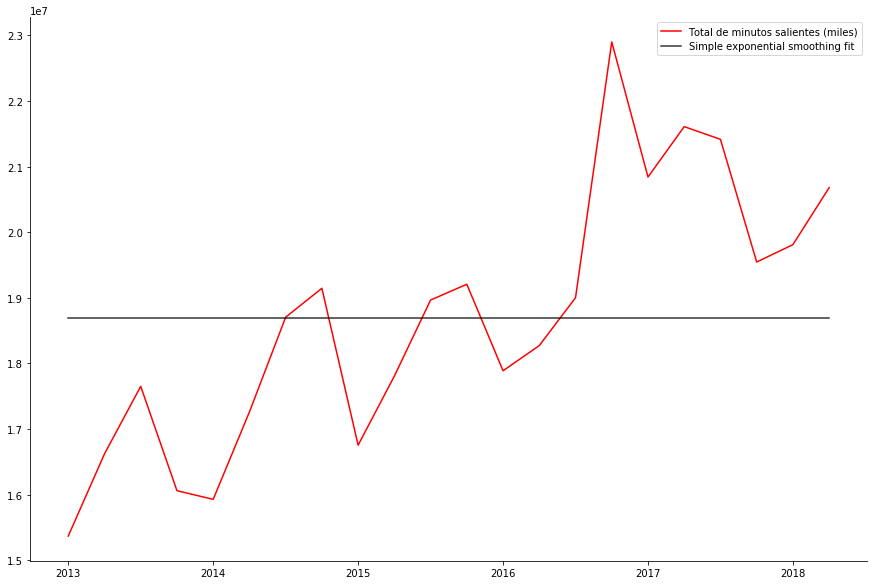

In [14]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color='red', label='Total de minutos salientes (miles)')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

In [15]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=0.8)#acá cambiamos el alpha
fitted_ses = model_ses.fittedvalues
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
aic_ses = model_ses.aic
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Smoothing parameter: alpha  0.800
 In-sample fit:
 MSE               1911607368013.260
 AIC               626.137
 BIC               628.319


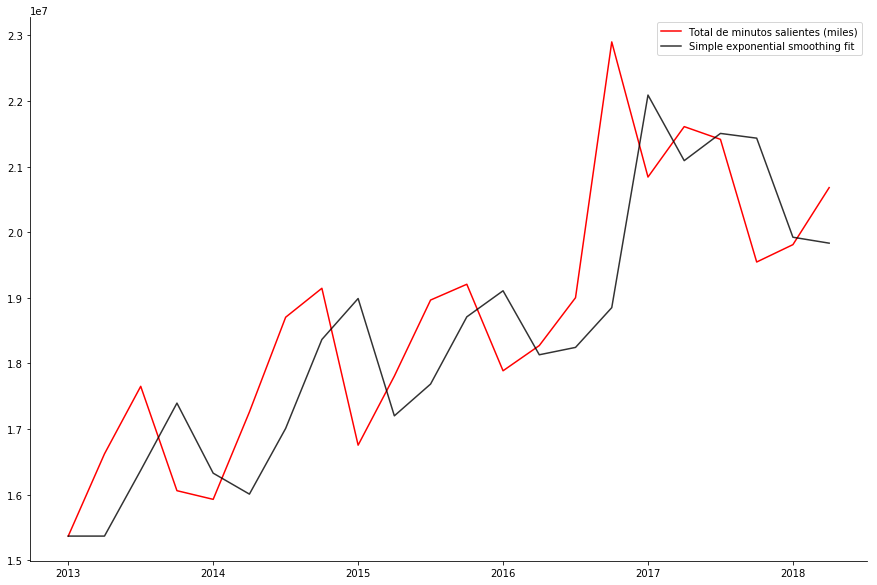

In [16]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color='red', label='Total de minutos salientes (miles)')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

In [28]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=0.5)#acá cambiamos el alpha
fitted_ses = model_ses.fittedvalues
alpha_ses = model_ses.model.params['smoothing_level']
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
aic_ses = model_ses.aic
bic_ses = model_ses.bic
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_ses))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Smoothing parameter: alpha  0.500
 In-sample fit:
 MSE               1847963020474.361
 AIC               625.392
 BIC               627.574


Si tomamos $\alpha$ igual a un medio se obeservan los valores predichos como el valor medio entre el valor medido anterior y el valor predicho anterior.

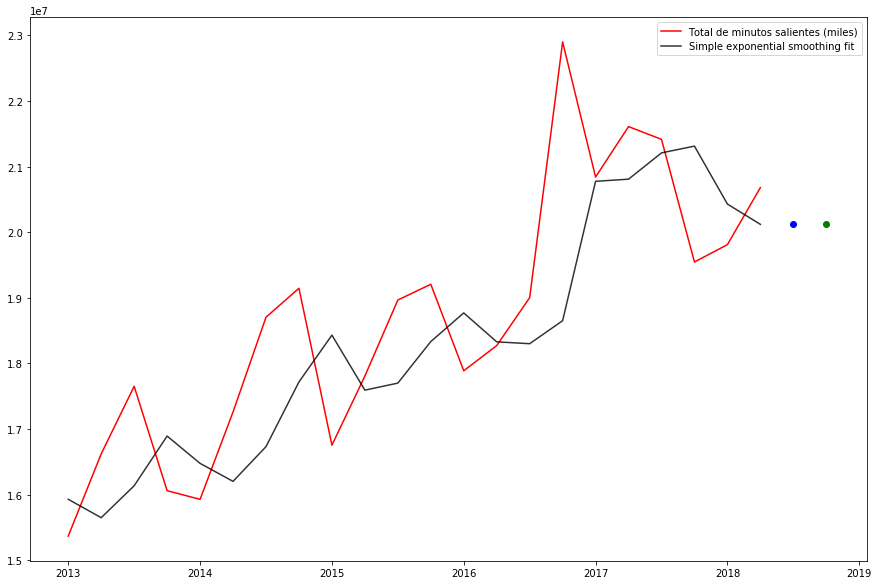

In [127]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color='red', label='Total de minutos salientes (miles)')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
plt.scatter(model_ses.predict(test[0]).index, model_ses.predict(test[0]),color='blue')
plt.scatter(model_ses.predict(test[1]).index, model_ses.predict(test[1]),color='green')
plt.show()

Se observa que al variar el valor del parámetro del modelo $\alpha$ de menor a mayor vemos como el mismo se asemeja mas a la serie temporal desplazada un intervalo de tiempo a la derecha.

El punto azul agregado representa la primer predicción usando todos los datos, el punto verde representa la predicción dada por todos los puntos más el punto azul. Si se realiza sucesivamente la construccion de nuevos datos predichos el resultado sera una linea con valor igual al del punto azul simplemente por como es la construcción de las predicciones.


Y me quedo con el modelo con alpha = 0.5 por que es el que menor error presenta de los tres valores probados.

# Análisis de Residuos

Procedemos a computar y visualizar los residuos $e_{t}=y_{t}-\hat{y}_{t}$ donde y son los valores de la serie e $\hat{y}_{t}=$ *model_ses.fittedvalues* son los valores predichos:

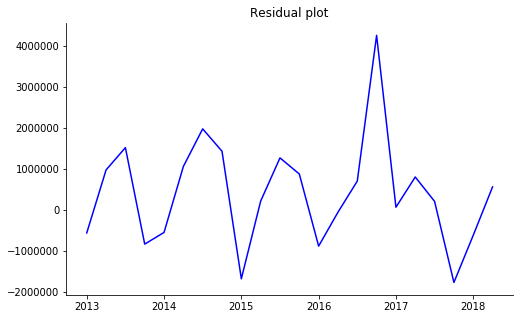

In [19]:
resid=y-fitted_ses
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color='blue')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

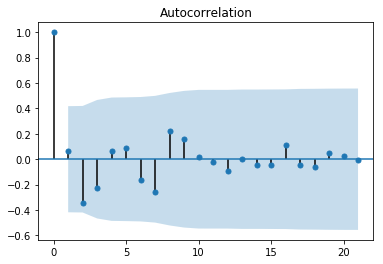

In [20]:
sm.graphics.tsa.plot_acf(resid)
plt.show()

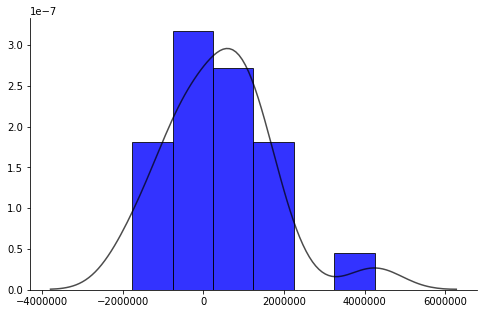

In [21]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': 'blue'},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

Los residuos no muestran un patrón claro, baja correlación por lo que siguen una distribución gaussiana y con media cercana a cero. Lo cual hace al modelo aceptable para el ultimo valor $\alpha = 0.5$.

# Exactitud de los modelos

A modo de comparación se implementa un pronostico a tiempo real usando Radom Walk y simple exponential smoothing. Para mostrar esta comparación se hace uso de *simple exponential smoothing* con $\alpha = 1$ para Random walk dado que es un caso particular del mismo con dicho valor y para simple exponential smoothing el valor de $\alpha = 0.5$ puesto que fue el que obtuvo mejor accuracy.

In [158]:
y1=y[:-1]

model_RW = sm.tsa.SimpleExpSmoothing(y1).fit(smoothing_level=1)
model_RW.forecast(1)[0]
    
model_ses = sm.tsa.SimpleExpSmoothing(y1).fit(smoothing_level=0.5) 
pred_ses.append(model_ses.forecast(1)[0])
    
dato=y.iloc[-1]

resultados=np.array([model_RW.forecast(1)[0],model_ses.forecast(1)[0],dato])
resultados=resultados.reshape(1,len(resultados))
results = pd.DataFrame(resultados,columns=['RW', 'SES', 'Actual'],index=[str(y.index[21])])

results

,RW,SES,Actual
2018Q2,19809971.0,2.011916e+07,20678910.0


Aunque no es estadisticamente correcto sacar una conclusión apartir de un punto se ve claramente una diferencia en los valores predichos por los dos modelos con **SES** más preciso.

# Predicciones Futuras

In [162]:
model_RW = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=1)
fitted_RW = model_RW.fittedvalues
predic_RW = model_RW.predict(test[0],test[3])

model_RW = pd.concat([fitted_RW,predic_RW])

model_ses = sm.tsa.SimpleExpSmoothing(y).fit(smoothing_level=0.5)
fitted_ses = model_ses.fittedvalues
predic_ses = model_ses.predict(test[0],test[3])

model_ses = pd.concat([fitted_ses,predic_ses])

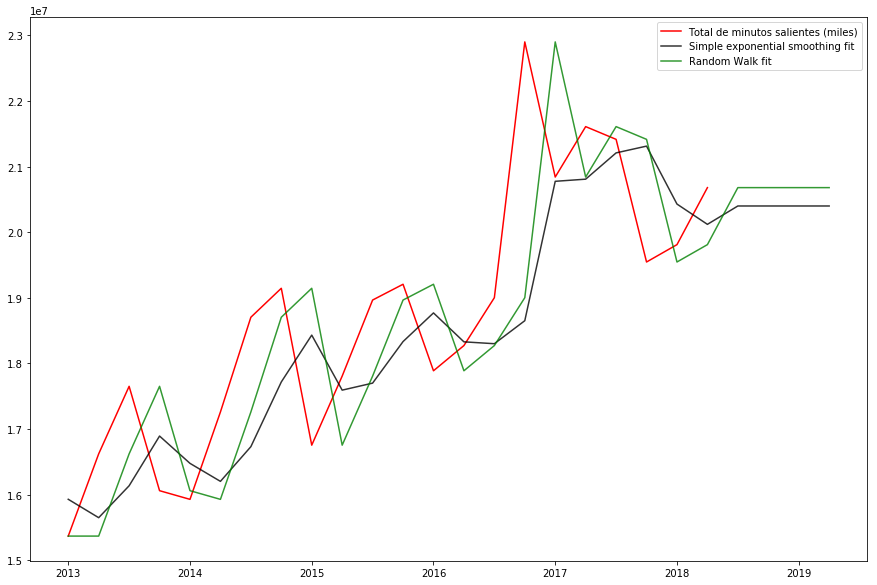

In [166]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color='red', label='Total de minutos salientes (miles)')
model_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
model_RW.plot(color='green', label='Random Walk fit', alpha=0.8)
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
plt.show()

Se puede ver entonces que un pronostico a tiempo real usando Random Walk y Simple exponential smoothing continuamente, va a resultar en un valor constante cerca de la ultima observación lo cual se puede ver directamente de la definición de Simple exponential smoothing *siempre y cuando* usemos **Expanding window**.

Demostración:

- $\hat{y}_{t+1}=l_{t}$

- $l_{t}=\alpha y_{t}+(1-\alpha)l_{t-1}$

Entonces si $\hat{y}_{T+1}$ es el segundo valor predicho (sin observación en T+1) e $y_{T}$ el primero en T, se tiene que $y_{T}$ = $\hat {y}_{T} = l_{T-1}$.

Por lo tanto 

- $\hat{y}_{T+1}=l_{T}$

- $l_{T}=\alpha \hat {y}_{T}+(1-\alpha)l_{T-1}$

- $l_{T}=\alpha \hat {y}_{T}+(1-\alpha) \hat {y}_{T}$, rapídamente podemos ver que

- $\hat{y}_{T+1}=\hat {y}_{T}$


En el caso que el conjunto de entrenamiento varie en cada pronostico es decir en el caso de **Rolling window** lo anterior no sera valido es decir las prediciones para el modelo Simple exponential smoothing con $\alpha \neq 1$  no seran constantes y seran más precisas en muchos casos dado que tienen en cuenta solo los eventos más recientes.

# Conclusiones

Los dos métodos vistos precisan en dar mas importancia a la última o últimas observaciones, ignorando entonces distintos patrones de la serie a lo largo del tiempo.

Respecto a la comparación de los modelos a mi parecer los resultados no varian mucho, mas allá de que SES muestre mejor precisión en el caso de usar expanding window, pero no pasa lo mismo en rolling window, en este caso me parece mucho mejor el metodo SES dado que para empezar no alcanza un valor estacionario, y porque deja de asignarle peso a los comportamientos muy lejanos en el tiempo.